In [10]:
%pip install pip tqdm numpy torch torchvision matplotlib scikit-learn torchinfo --upgrade

  Using cached scipy-1.11.3-cp311-cp311-macosx_12_0_arm64.whl.metadata (165 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 46.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 26.4 MB/s eta 0:00:00
Using cached scipy-1.11.3-cp311-cp311-macosx_12_0_arm64.whl (29.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchinfo import summary
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import random as rd
from tqdm import tqdm

# if torch.backends.mps.is_available():
#     torch.set_default_device("mps")

In [2]:
transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root='./data', download=True, train=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', download=True, train=False, transform=transform)

In [3]:
len(train_dataset + test_dataset)

70000

In [4]:
image, label = train_dataset[0]
image.squeeze().shape, label

(torch.Size([28, 28]), 5)

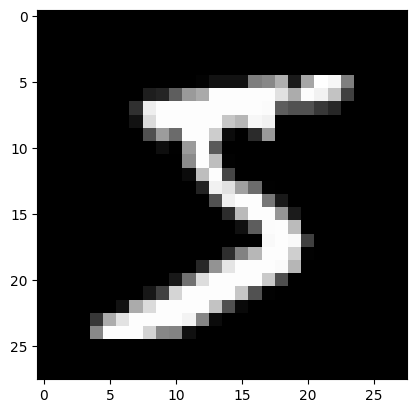

In [5]:
plt.imshow(image.squeeze(), cmap='gray')

In [6]:
(image.squeeze()).unsqueeze(dim=0).shape

torch.Size([1, 28, 28])

In [7]:
X_train = []
X_test = []
y_train = []
y_test = []

for image, label in tqdm(desc="Load train_dataset", iterable=train_dataset):
    X_train.append(image.reshape(784))
    y_train.append(label)

for image, label in tqdm(desc="Load test_dataset", iterable=test_dataset):
    X_test.append(image.reshape(784))
    y_test.append(label)

Load train_dataset:   0%|          | 0/60000 [00:00<?, ?it/s]

Load test_dataset: 100%|██████████| 10000/10000 [00:00<00:00, 17761.89it/s]


In [8]:
X_train_tensor = torch.from_numpy(np.array(X_train))
y_train_tensor = F.one_hot(torch.tensor(y_train), num_classes=10).float()
X_val_tensor = torch.from_numpy(np.array(X_test))
y_val_tensor = F.one_hot(torch.tensor(y_test), num_classes=10).float()

In [9]:
# Define the MLP architecture
class MNIST_MLP(nn.Module):
    def __init__(self):
        super(MNIST_MLP, self).__init__()
        self.ly1 = nn.Linear(784, 100)
        self.ly2 = nn.Linear(100, 50)
        self.ly3 = nn.Linear(50, 10)
        
        
    def forward(self, x):
        out = F.relu(self.ly1(x))
        out = F.relu(self.ly2(out))
        out = self.ly3(out)
        
        return out

In [10]:
# Create an instance of the MLP model
model = MNIST_MLP()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.03)

In [19]:
summary(model, input_size=(60000, 784))

Layer (type:depth-idx)                   Output Shape              Param #
MNIST_MLP                                [60000, 10]               --
├─Linear: 1-1                            [60000, 100]              78,500
├─Linear: 1-2                            [60000, 50]               5,050
├─Linear: 1-3                            [60000, 10]               510
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 5.04
Input size (MB): 188.16
Forward/backward pass size (MB): 76.80
Params size (MB): 0.34
Estimated Total Size (MB): 265.30

In [12]:
model.eval()
y_pred = model(X_val_tensor)
before_train = criterion(y_pred, y_val_tensor)
print('Test loss before training' , before_train.item())

Test loss before training 2.3063571453094482


In [13]:
loss_ar = []

In [12]:
X_train_tensor.size()

torch.Size([60000, 784])

In [14]:
# Train the model
model.train()
epoch = 5000

for epoch in (pbar:= tqdm(range(epoch))):
    # Forward pass
    y_pred = model(X_train_tensor)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train_tensor)
    loss_ar.append(loss.item())

    pbar.set_postfix_str(f"Loss: {loss.item()}")
    
    # Zero grad
    optimizer.zero_grad()

    # Backward pass
    loss.backward()
    optimizer.step()

100%|██████████| 5000/5000 [06:51<00:00, 12.16it/s, Loss: 0.1655007004737854] 


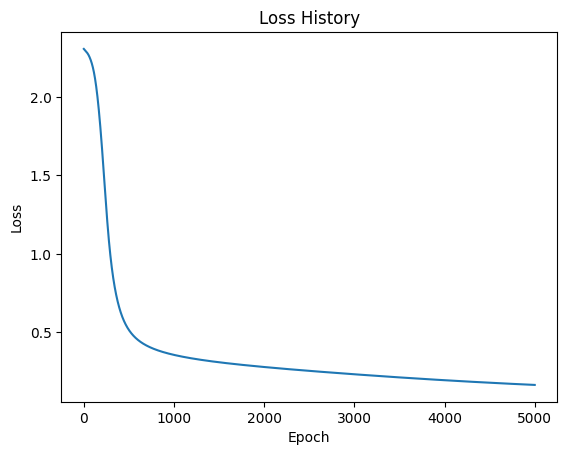

In [15]:
# Plotting the loss history
plt.plot(loss_ar)
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [16]:
model.eval()
y_pred = model(X_val_tensor)
after_train = criterion(y_pred.squeeze(), y_val_tensor)
print('Test loss after training', after_train.item())

Test loss after training 0.16877911984920502


# Run a test using predefined values

In [23]:
X_input_indx = rd.randint(0, len(test_dataset))

image, label = test_dataset[X_input_indx]
image.squeeze().shape, label

(torch.Size([28, 28]), 6)

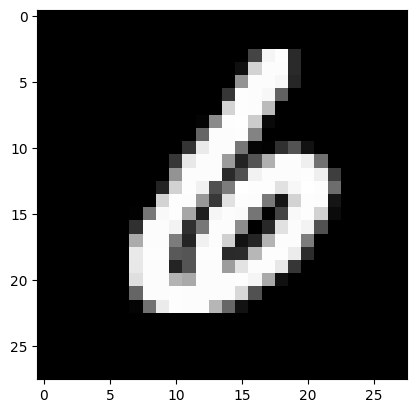

In [24]:
plt.imshow(image.squeeze(), cmap='gray')

In [25]:
X_final = torch.from_numpy(np.array([image.reshape(784)]))

model.eval()
output = (model(X_final) ** 2).sqrt().squeeze()

for i in range(10):
    print(i, (output / output.sum())[i].item() * 100)

0 1.6291476786136627
1 15.288446843624115
2 8.201885223388672
3 1.4277971349656582
4 3.1599637120962143
5 0.023077381774783134
6 36.25275790691376
7 23.46499264240265
8 2.15452890843153
9 8.397406339645386
